In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
import scipy.stats as stats
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

# Format plot functions

In [3]:
import matplotlib

font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 8}

matplotlib.rc('font', **font)
matplotlib.rcParams['axes.linewidth'] = 0.25
matplotlib.rcParams['lines.linewidth'] = 1

def format_figure(ax,title=None,xlabel=None,ylabel=None,despine=True,detick=False):
    if title != None:
        ax.set_title(title  , pad   = 5,fontsize=8)
    if xlabel != None:
        ax.set_xlabel(xlabel,labelpad = 5,fontsize=8)
    if ylabel != None:
        ax.set_ylabel(ylabel,labelpad = 5,fontsize=8)  
    if despine:
        sns.despine()
    if detick:
        plt.tick_params(left = False, right = False , labelleft = False ,
            labelbottom = False, bottom = False)

# Run_1_1: Concordance v. Temporal Resolution

### Visualize example trajectories

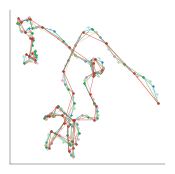

In [226]:
fig,ax = plt.subplots(figsize=(2,2))
col = plt.cm.Paired(np.arange(6))
i = 0
for n in np.arange(2,12+1,2):
    traj = pd.read_csv('outputs/run_1_1-HT1080_2D_'+str(n)+'min.csv',
               names = ["cell_id","Time","x","y"])
    traj = traj[traj["cell_id"] == 55]
    traj.loc[:,"resolution"] = n
    ax.plot(traj['x'],traj['y'],'.-',color=col[i],markersize=1,linewidth=0.25)
    i+=1
format_figure(ax,detick=True)
plt.savefig('outputs/plots/fig1A_0.png',dpi=300)
plt.savefig('outputs/plots/fig1A_0.svg',dpi=300)

### Visualize concordance v. temporal resolution:

In [227]:
concordance = pd.read_csv('outputs/run_1_1-concordances.csv',
                          names = np.arange(2,12+1,2))
concordance_long = pd.melt(concordance)

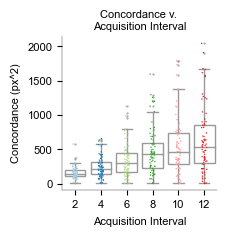

In [228]:
fig,ax = plt.subplots(figsize=(2,2))
matplotlib.rcParams['svg.fonttype'] = 'none'
sns.boxplot(x=concordance_long["variable"],y=concordance_long["value"], 
            color="white",
            flierprops=dict(marker='.',markersize=1))
sns.stripplot(x=concordance_long["variable"],y=concordance_long["value"],hue=concordance_long["variable"],
                size=1, palette = 'Paired',ax=ax)
ax.legend_.remove()
format_figure(ax,title="Concordance v. \nAcquisition Interval",
              xlabel="Acquisition Interval",ylabel="Concordance (px^2)")
plt.savefig('outputs/plots/fig1A_1.png',dpi=300,bbox_inches="tight")
plt.savefig('outputs/plots/fig1A_1.svg',dpi=300,bbox_inches="tight")

In [229]:
import scipy.stats as stats
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

stats.kruskal(concordance.values[:,0],
               concordance.values[:,1],
               concordance.values[:,2],
               concordance.values[:,3],
               concordance.values[:,4],
               concordance.values[:,5])

KruskalResult(statistic=108.92080650406501, pvalue=6.9268910368206835e-22)

In [230]:
sp.posthoc_dunn(concordance_long, val_col='value', group_col='variable',p_adjust='bonferroni')

,2,4,6,8,10,12
2,1.000000e+00,6.123087e-02,0.000006,2.576194e-11,1.023163e-13,8.222384e-17
4,6.123087e-02,1.000000e+00,0.412492,4.297495e-04,1.324929e-05,1.181160e-07
6,5.778795e-06,4.124921e-01,1.000000,7.162505e-01,1.004238e-01,5.421101e-03
8,2.576194e-11,4.297495e-04,0.716251,1.000000e+00,1.000000e+00,1.000000e+00
10,1.023163e-13,1.324929e-05,0.100424,1.000000e+00,1.000000e+00,1.000000e+00
12,8.222384e-17,1.181160e-07,0.005421,1.000000e+00,1.000000e+00,1.000000e+00


# Run_1_2: Symmetric/Asymmetric interpolation v. pMC

**Symmetric interpolation**

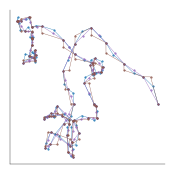

In [249]:
fig,ax = plt.subplots(figsize=(2,2))
col = plt.cm.tab10(np.arange(10))
col = [col[0],col[4],col[5]]
i = 0
for n in ['traj_4m','traj_4m_symm_interp','traj_4m_symm_MC_interp']:
    traj = pd.read_csv('outputs/run_1_2-'+(n)+'.csv',
               names = ["cell_id","Time","x","y"])
    traj = traj[traj["cell_id"] == 55]
    traj.loc[:,"resolution"] = n
    ax.plot(traj['x'],traj['y'],'.-',color=col[i],markersize=1,linewidth=0.25)
    i+=1
format_figure(ax,detick=True)
plt.savefig('outputs/plots/fig1B_0.png',dpi=300)
plt.savefig('outputs/plots/fig1B_0.svg',dpi=300)

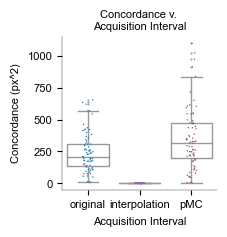

In [252]:
concordance = pd.read_csv('outputs/run_1_2-concordance_symm.csv',
                          names = ['original','interpolation','pMC'])
concordance_long = pd.melt(concordance)

col = plt.cm.tab10(np.arange(10))
col = [col[0],col[4],col[5]]

fig,ax = plt.subplots(figsize=(2,2))
matplotlib.rcParams['svg.fonttype'] = 'none'
sns.boxplot(x=concordance_long["variable"],y=concordance_long["value"], 
            color="white",
            flierprops=dict(marker='.',markersize=1))
sns.stripplot(x=concordance_long["variable"],y=concordance_long["value"],hue=concordance_long["variable"],
                size=1, palette = col,ax=ax)
ax.legend_.remove()
format_figure(ax,title="Concordance v. \nAcquisition Interval",
              xlabel="Acquisition Interval",ylabel="Concordance (px^2)")
plt.savefig('outputs/plots/fig1B_1.png',dpi=300,bbox_inches="tight")
plt.savefig('outputs/plots/fig1B_1.svg',dpi=300,bbox_inches="tight")

In [253]:
stats.kruskal(concordance['original'].values,
               concordance['interpolation'].values,
               concordance['pMC'].values)

KruskalResult(statistic=153.0432251720747, pvalue=5.849057725816544e-34)

In [254]:
sp.posthoc_dunn(concordance_long, val_col='value', group_col='variable',p_adjust='bonferroni')

,interpolation,original,pMC
interpolation,1.000000e+00,1.966529e-21,2.326025e-30
original,1.966529e-21,1.000000e+00,1.625597e-01
pMC,2.326025e-30,1.625597e-01,1.000000e+00


**asymmetric interpolation**

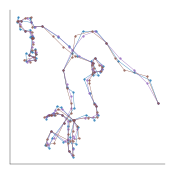

In [258]:
fig,ax = plt.subplots(figsize=(2,2))
col = plt.cm.tab10(np.arange(10))
col = [col[0],col[4],col[5]]
i = 0
for n in ['traj_6m','traj_6m_asymm_interp','traj_6m_asymm_MC']:
    traj = pd.read_csv('outputs/run_1_2-'+(n)+'.csv',
               names = ["cell_id","Time","x","y"])
    traj = traj[traj["cell_id"] == 55]
    traj.loc[:,"resolution"] = n
    ax.plot(traj['x'],traj['y'],'.-',color=col[i],markersize=1,linewidth=0.25)
    i+=1
format_figure(ax,detick=True)
plt.savefig('outputs/plots/fig1C_0.png',dpi=300)
plt.savefig('outputs/plots/fig1C_0.svg',dpi=300)

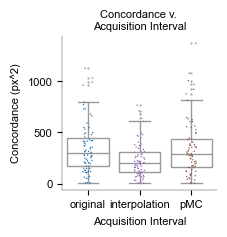

In [259]:
concordance = pd.read_csv('outputs/run_1_2-concordance_asymm.csv',
                          names = ['original','interpolation','pMC'])
concordance_long = pd.melt(concordance)

col = plt.cm.tab10(np.arange(10))
col = [col[0],col[4],col[5]]

fig,ax = plt.subplots(figsize=(2,2))
matplotlib.rcParams['svg.fonttype'] = 'none'
sns.boxplot(x=concordance_long["variable"],y=concordance_long["value"], 
            color="white",
            flierprops=dict(marker='.',markersize=1))
sns.stripplot(x=concordance_long["variable"],y=concordance_long["value"],hue=concordance_long["variable"],
                size=1, palette = col,ax=ax)
ax.legend_.remove()
format_figure(ax,title="Concordance v. \nAcquisition Interval",
              xlabel="Acquisition Interval",ylabel="Concordance (px^2)")
plt.savefig('outputs/plots/fig1C_1.png',dpi=300,bbox_inches="tight")
plt.savefig('outputs/plots/fig1C_1.svg',dpi=300,bbox_inches="tight")

In [260]:
import scipy.stats as stats
stats.kruskal(concordance.values[:,0],
               concordance.values[:,1],
               concordance.values[:,2])

KruskalResult(statistic=11.873208259587045, pvalue=0.002640982875477748)

In [261]:
sp.posthoc_dunn(concordance_long, val_col='value', group_col='variable',p_adjust='bonferroni')

,interpolation,original,pMC
interpolation,1.000000,0.006095,0.012272
original,0.006095,1.000000,1.000000
pMC,0.012272,1.000000,1.000000


In [262]:
col

[array([0.12156863, 0.46666667, 0.70588235, 1.        ]),
 array([0.58039216, 0.40392157, 0.74117647, 1.        ]),
 array([0.54901961, 0.3372549 , 0.29411765, 1.        ])]

# Run 1_3

In [72]:
pmc_data = []

# original data:
read_data = pd.read_csv("outputs/Run_1_3_HO_original.csv",names=["Sp","MSD4","MSD20","Pp", "Pnp", "Dp", "Dnp", "Dtot", "phi"])
read_data["pmc"]="original"
pmc_data.append(read_data)
# interpolated data
read_data = pd.read_csv("outputs/Run_1_3_HO_interp.csv",names=["Sp","MSD4","MSD20","Pp", "Pnp", "Dp", "Dnp", "Dtot", "phi"])
read_data["pmc"]="interp"
pmc_data.append(read_data)

for pmc in [1, 2, 2.01, 3]:
    read_data = pd.read_csv("outputs/Run_1_3_HO_mc_"+str(int(pmc))+".csv",names=["Sp","MSD4","MSD20","Pp", "Pnp", "Dp", "Dnp", "Dtot", "phi"])
    read_data["pmc"]="pMC = " + str((pmc))
    pmc_data.append(read_data)


pmc_data = pd.concat(pmc_data)

In [73]:
np.unique(pmc_data["pmc"])

array(['interp', 'original', 'pMC = 1', 'pMC = 2', 'pMC = 2.01',
       'pMC = 3'], dtype=object)

In [74]:
pmc_data

,Sp,MSD4,MSD20,Pp,Pnp,Dp,Dnp,Dtot,phi,pmc
0,1.392291,44.592718,325.684571,2.179969,6.547887,2.549059,1.969743,4.518802,1.294107,original
1,1.235449,34.104560,505.480833,16.794231,9.848141,9.207930,4.357256,13.565185,2.113240,original
2,0.165938,0.572379,1.567472,0.292439,0.299916,0.006313,0.007696,0.014009,0.820374,original
3,1.077982,28.628022,325.032468,13.444235,2.742668,5.316335,1.606439,6.922774,3.309390,original
4,0.912259,21.063372,259.506718,6.303879,4.675107,2.664443,1.626376,4.290819,1.638270,original
...,...,...,...,...,...,...,...,...,...,...
70,0.993523,26.794678,330.903772,29.362517,14.266486,10.452500,2.637673,13.090174,3.962773,pMC = 3
71,0.727101,14.784192,174.737833,29.587678,14.471481,4.766412,1.708216,6.474628,2.790287,pMC = 3
72,0.966939,23.890890,274.633528,13.168422,3.094422,4.161643,1.427697,5.589340,2.914935,pMC = 3
73,1.608989,64.635299,630.296621,5.884968,5.476568,7.084238,3.511496,10.595734,2.017442,pMC = 3


KruskalResult(statistic=90.41638974014533, pvalue=5.4934916970640034e-18)
                  interp      original       pMC = 1       pMC = 2  \
interp      1.000000e+00  1.000000e+00  2.096573e-15  1.000000e+00   
original    1.000000e+00  1.000000e+00  1.520422e-09  1.000000e+00   
pMC = 1     2.096573e-15  1.520422e-09  1.000000e+00  4.855471e-10   
pMC = 2     1.000000e+00  1.000000e+00  4.855471e-10  1.000000e+00   
pMC = 2.01  1.000000e+00  1.000000e+00  4.855471e-10  1.000000e+00   
pMC = 3     1.000000e+00  1.000000e+00  1.370482e-13  1.000000e+00   

              pMC = 2.01       pMC = 3  
interp      1.000000e+00  1.000000e+00  
original    1.000000e+00  1.000000e+00  
pMC = 1     4.855471e-10  1.370482e-13  
pMC = 2     1.000000e+00  1.000000e+00  
pMC = 2.01  1.000000e+00  1.000000e+00  
pMC = 3     1.000000e+00  1.000000e+00  
KruskalResult(statistic=115.14529510590498, pvalue=3.3455702037073244e-23)
                  interp      original       pMC = 1   pMC = 2  pMC = 2.0

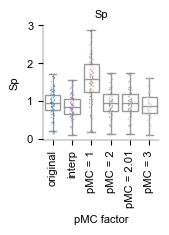

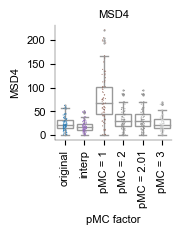

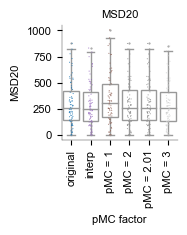

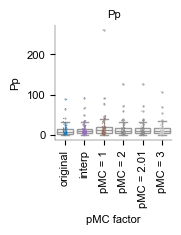

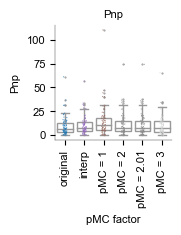

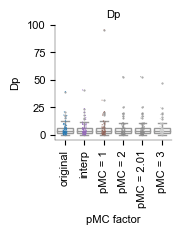

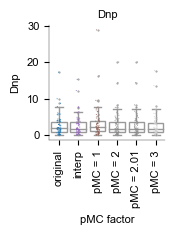

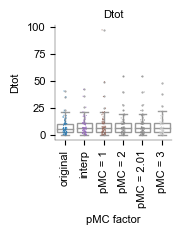

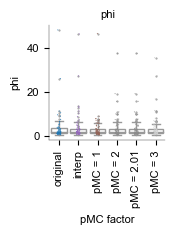

In [91]:
col = plt.cm.tab10(np.arange(10))
col = [col[0],col[4],'#926458','#8B8B8B','#8B8B8B','#CDCECE']
for f in pmc_data.columns[:9]:
    fig,ax = plt.subplots(figsize=(1.5,1.5))
    matplotlib.rcParams['svg.fonttype'] = 'none'
    sns.boxplot(pmc_data,x="pmc",y=f, 
                color="white",
                flierprops=dict(marker='.',markersize=1))
    sns.stripplot(x=pmc_data["pmc"], y=pmc_data[f],hue=pmc_data["pmc"], palette=col,
                   size=.8,ax=ax,alpha=0.8)
    ax.legend_.remove()
    ax.tick_params(axis='x', labelrotation=90) 
    format_figure(ax,title=f, xlabel="pMC factor", ylabel=f)
    
    test_data = []
    for group in np.unique(pmc_data["pmc"]):
        test_data.append(pmc_data.loc[pmc_data["pmc"]==group, f].values)
    res = stats.kruskal(*test_data)
    print(res)
#     if res.pvalue < 0.05:
    res = sp.posthoc_dunn(pmc_data, val_col=f, group_col='pmc',p_adjust='bonferroni')
#     res = sp.posthoc_tukey(pmc_data, val_col=f, group_col='pmc')
    print(res)
    plt.savefig("outputs/plots/fig1E_"+f+".png",dpi=300,bbox_inches="tight")
    plt.savefig("outputs/plots/fig1E_"+f+".svg",dpi=300,bbox_inches="tight")

In [279]:
len(test_data[0])

75

In [196]:
stats.kruskal(pmc_data.loc[pmc_data["pmc"]=="original", "MSD10"].values, 
              pmc_data.loc[pmc_data["pmc"]=="interp", f].values,
              pmc_data.loc[pmc_data["pmc"]=="pMC = 2.0", f].values,
              pmc_data.loc[pmc_data["pmc"]=="pMC = 2.01", f].values)

KruskalResult(statistic=153.33421395348842, pvalue=5.028786899151752e-33)

In [198]:
test_data = []
for group in np.unique(pmc_data["pmc"]):
    test_data.append(pmc_data.loc[pmc_data["pmc"]==group, "MSD10"].values)

In [201]:
stats.kruskal(*test_data)

KruskalResult(statistic=97.33919238457747, pvalue=7.009824491611515e-10)